<a href="https://colab.research.google.com/github/jcjimenezb123/MetodosNumericosPython/blob/master/EcuacionesNoLineales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Métodos numéricos

Desarrollo de métodos para resolver ecuaciones no lineales

In [1]:
#import de bibliotecas necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##Bisección

Definición de la función del método de **Bisección**

In [2]:
#Esciba el código del método de Bisección
def biseccion(f,x0,x1,tol=1e-5):
  '''
  El metodo de Bisección es un método cerrado para resolver ecuaciones no lineales
  los argumentos son:
  Entrada
  -------
       f : Ecuación a resolver expresada en la forma f(x)=0
  x0, x1 : Puntos que encierran la raiz f(x0)*f(x1)<0
     tol : Tolerancia (valor por defecto 1e-5)
  Salida
  ------
      x : Raíz de la ecuación
  tabla : Tabla de iteraciones
  '''
  #validación del rango que encierra la raíz
  if f(x0)*f(x1)>0:
    raise Exception('Rango invalido, no cruza el eje x!!')
  x=x0 #valor inicial
  #encabezado de la tabla de iteracioens
  tabla=pd.DataFrame(columns=['x0','x','x1','f(x0)','f(x)','f(x1)'])
  #valida el criterio de convergencia
  while np.abs(f(x))>tol:
    x=(x0+x1)/2 #divide el rango a la mitad, método de Bisección
    #inserta la iteración a la tabla
    tabla=tabla.append({'x0':x0,'x':x,'x1':x1,
                        'f(x0)':f(x0),'f(x)':f(x),'f(x1)':f(x1)},
                       ignore_index=True)
    #valida si la raíz se encuentra en el intervalo [x0,x]
    if f(x0)*f(x)<0:
      x1=x
    #valida si la raíz se encuentra en el intervalo [x,x1]
    else:
      x0=x
  #retorna la raíz y la tabla de iteraciones
  return x,tabla

In [3]:
#Ayuda de la función
help(biseccion)

Help on function biseccion in module __main__:

biseccion(f, x0, x1, tol=1e-05)
    El metodo de Bisección es un método cerrado para resolver ecuaciones no lineales
    los argumentos son:
    Entrada
    -------
         f : Ecuación a resolver expresada en la forma f(x)=0
    x0, x1 : Puntos que encierran la raiz f(x0)*f(x1)<0
       tol : Tolerancia (valor por defecto 1e-5)
    Salida
    ------
        x : Raíz de la ecuación
    tabla : Tabla de iteraciones



**Problema**: Encontrar la raíz cuadrada de 2 usando el método de **Bisección**

$$
\sqrt{2}=x\\
2=x^2\\
f(x)=x^2-2=0
$$

In [4]:
#definir la función a resolver
def f(x):
  return x**2-2


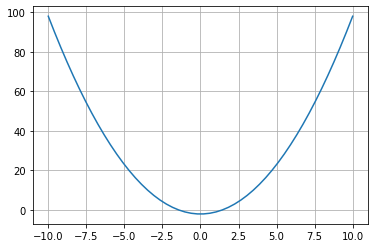

In [5]:
#Graficar la función para identificar el comportamiento y ubicar los puntos iniciales
x=np.linspace(-10,10)
y=f(x)
plt.plot(x,y)
plt.grid()
plt.show()


In [6]:
#Hacer la llamada a la función
raiz,tabla=biseccion(f,0,2.5)
print(raiz)
tabla

1.4142131805419922


,x0,x,x1,f(x0),f(x),f(x1)
0,0.000000,1.250000,2.500000,-2.000000,-0.437500,4.250000
1,1.250000,1.875000,2.500000,-0.437500,1.515625,4.250000
2,1.250000,1.562500,1.875000,-0.437500,0.441406,1.515625
3,1.250000,1.406250,1.562500,-0.437500,-0.022461,0.441406
4,1.406250,1.484375,1.562500,-0.022461,0.203369,0.441406
5,1.406250,1.445312,1.484375,-0.022461,0.088928,0.203369
6,1.406250,1.425781,1.445312,-0.022461,0.032852,0.088928
7,1.406250,1.416016,1.425781,-0.022461,0.005100,0.032852
8,1.406250,1.411133,1.416016,-0.022461,-0.008704,0.005100
9,1.411133,1.413574,1.416016,-0.008704,-0.001808,0.005100


**Problema**: Encontrar la raíz cúbica de 5 usando el método de **Bisección**

$$
\sqrt[3]{5}=x\\
5=x^3\\
f(x)=x^3-5=0
$$

In [7]:
#definir la función a resolver
def f(x):
  return x**3-5

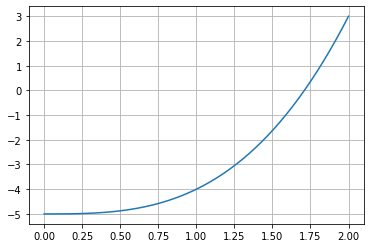

In [8]:
#Graficar la función para identificar el comportamiento y ubicar los puntos iniciales
x=np.linspace(0,2)
y=f(x)
plt.plot(x,y)
plt.grid()
plt.show()

In [9]:
#Hacer la llamada a la función
r,t=biseccion(f,1.5,1.75)
print(r)
t

1.7099761962890625


,x0,x,x1,f(x0),f(x),f(x1)
0,1.500000,1.625000,1.750000,-1.625000,-0.708984,0.359375
1,1.625000,1.687500,1.750000,-0.708984,-0.194580,0.359375
2,1.687500,1.718750,1.750000,-0.194580,0.077362,0.359375
3,1.687500,1.703125,1.718750,-0.194580,-0.059856,0.077362
4,1.703125,1.710938,1.718750,-0.059856,0.008440,0.077362
5,1.703125,1.707031,1.710938,-0.059856,-0.025787,0.008440
6,1.707031,1.708984,1.710938,-0.025787,-0.008693,0.008440
7,1.708984,1.709961,1.710938,-0.008693,-0.000132,0.008440
8,1.709961,1.710449,1.710938,-0.000132,0.004153,0.008440
9,1.709961,1.710205,1.710449,-0.000132,0.002010,0.004153


##Regla Falsa

In [10]:
#Definición de la función para el método de la Regla Falsa
def reglafalsa(f,x0,x1,tol=1e-5):
  '''
  El metodo de la *Regla Falsa* es un método cerrado para resolver ecuaciones no lineales
  los argumentos son:
  Entrada
  -------
       f : Ecuación a resolver expresada en la forma f(x)=0
  x0, x1 : Puntos que encierran la raiz f(x0)*f(x1)<0
     tol : Tolerancia (valor por defecto 1e-5)
  Salida
  ------
      x : Raíz de la ecuación
  tabla : Tabla de iteraciones
  '''
  #validación del rango que encierra la raíz
  if f(x0)*f(x1)>0:
    raise Exception('Rango invalido, no cruza el eje x!!')
  x=x0 #valor inicial
  #encabezado de la tabla de iteracioens
  tabla=pd.DataFrame(columns=['x0','x','x1','f(x0)','f(x)','f(x1)'])
  #valida el criterio de convergencia
  while np.abs(f(x))>tol:
    x=(x0*f(x1)-x1*f(x0))/(f(x1)-f(x0)) #calcula x, método de Regla Falsa
    #inserta la iteración a la tabla
    tabla=tabla.append({'x0':x0,'x':x,'x1':x1,
                        'f(x0)':f(x0),'f(x)':f(x),'f(x1)':f(x1)},
                       ignore_index=True)
    #valida si la raíz se encuentra en el intervalo [x0,x]
    if f(x0)*f(x)<0:
      x1=x
    #valida si la raíz se encuentra en el intervalo [x,x1]
    else:
      x0=x
  #retorna la raíz y la tabla de iteraciones
  return x,tabla

**Problema**: Calcular la altura del agua en un tanque esférico que contenga $1000 l$ si el radio del tanque es $R=10$

$$
V=\pi h^2\left( \frac{3R-h}{3}\right)\\
1000=\pi h^2\left( \frac{30-h}{3}\right)\\
f(h)=\pi h^2\left( \frac{30-h}{3}\right)-1000=0
$$

In [11]:
#definir la función a resolver
def f(h):
  return np.pi*h**2*(30-h)/3-1000


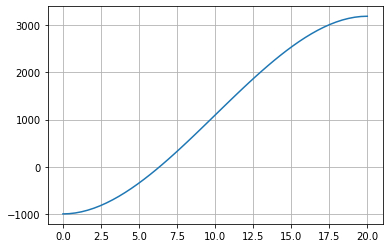

In [12]:
#Graficar la función para identificar el comportamiento y ubicar los puntos iniciales
x=np.linspace(0,20)
y=f(x)
plt.plot(x,y)
plt.grid()
plt.show()


In [13]:
#Hacer la llamada a la función
h,t=reglafalsa(f,5,7.5)
print(h)
t

6.355008054423839


,x0,x,x1,f(x0),f(x),f(x1)
0,5.000000,6.287530,7.5,-345.501531,-18.329822,325.359401
1,6.287530,6.352194,7.5,-18.329822,-0.766389,325.359401
2,6.352194,6.354892,7.5,-0.766389,-0.031675,325.359401
3,6.354892,6.355003,7.5,-0.031675,-0.001309,325.359401
4,6.355003,6.355008,7.5,-0.001309,-0.000054,325.359401
5,6.355008,6.355008,7.5,-0.000054,-0.000002,325.359401


##Newton-Raphson

In [44]:
#Definición de la función para el método de Newton-Raphson
def nr(f,df,x,tol=1e-5):
  tabla=pd.DataFrame(columns=['x','f(x)','df(x)'])
  while np.abs(f(x))>tol:
    x=x-f(x)/df(x)
    tabla=tabla.append({'x':x,
                        'f(x)':f(x),
                        'df(x)':df(x)},
                       ignore_index=True)
    
  return x,tabla


Fluye aire a una temperatura de 25 C y
1 atm a través de un tubo de 4 mm de diámetro a una velocidad promedio de 50 m/s. La
rugosidad es de $\epsilon= 0.0015mm$ y $Re=13743$. Calcular el factor de fricción usando la ecuación
de Colebrook.
$$
\frac{1}{\sqrt{f}}=
-2.0log\left(\frac{\epsilon/D}{3.7}
+
\frac{2.51}{Re\sqrt{f}}
\right)\\
F(f)=\frac{1}{\sqrt{f}}+2.0log\left(\frac{\epsilon/D}{3.7}
+
\frac{2.51}{Re\sqrt{f}}
\right)\\
F'(f)=\frac{-1}{2\sqrt{f^3}}-\frac{2.51}{Re\sqrt{f^3}\frac{2.51}{Re\sqrt{f}}+\frac{\epsilon /D}{3.7}}
$$

In [35]:
#definir la función a resolver
def F(f):
  e=0.0015
  D=4
  Re=13743
  return 1/np.sqrt(f)+2*np.log10(e/D/3.7+2.51/(Re*np.sqrt(f)))


In [39]:
F(0.03)

-0.10072077382838351

In [22]:
#obtener la derivada
from sympy import *
f,e,D,Re=symbols('f e D Re')
derivada=diff(1/sqrt(f)+2*log(e/D/3.7+2.51/(Re*sqrt(f))),f)
derivada

-1/(2*f**(3/2)) - 2.51/(Re*f**(3/2)*(2.51/(Re*sqrt(f)) + 0.27027027027027*e/D))

In [29]:
#definir la derivada
def dF(f):
  e=0.0015
  D=4
  Re=13743
  return -1/(2*f**(3/2))-2.51/(Re*f**(3/2)*(2.51/(Re*np.sqrt(f))+0.27027027027*e/D))

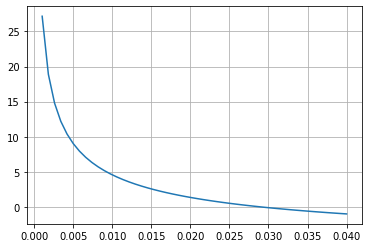

In [42]:
#Graficar la función para identificar el comportamiento y ubicar los puntos iniciales
x=np.linspace(0.001,0.04)
y=F(x)
plt.plot(x,y)
plt.grid()
plt.show()


In [47]:
#Hacer la llamada a la función
from scipy import optimize

r=optimize.newton(F,0.005,dF)
print(r)


0.02909962040151198


In [50]:
r,t=nr(F,dF,0.005,1e-10)
print(r)
t

0.029099621182496406


,x,f(x),df(x)
0,0.010602,4.258232e+00,-547.281563
1,0.018382,1.697454e+00,-251.212976
2,0.025139,5.030908e-01,-162.002952
3,0.028245,9.989425e-02,-137.717568
4,0.028970,1.486369e-02,-132.941248
5,0.029082,2.030639e-03,-132.230564
6,0.029097,2.735683e-04,-132.133466
7,0.029099,3.678380e-05,-132.120384
8,0.029100,4.944629e-06,-132.118625
9,0.029100,6.646538e-07,-132.118389


##Secante

In [ ]:
#Definición de la función para el método de Secante



**Problema**: Fluye aire a una temperatura de 25 C y
1 atm a través de un tubo de 4 mm de diámetro a una velocidad promedio de 50 m/s. La
rugosidad es de $\epsilon= 0.0015mm$ y $Re=13743$. Calcular el factor de fricción usando la ecuación
de Colebrook.
$$
\frac{1}{\sqrt{f}}=
-2.0log\left(\frac{\epsilon/D}{3.7}
+
\frac{2.51}{Re\sqrt{f}}
\right)\\
F(f)=\frac{1}{\sqrt{f}}+2.0log\left(\frac{\epsilon/D}{3.7}
+
\frac{2.51}{Re\sqrt{f}}
\right)
$$

In [ ]:
#definir la función a resolver



In [ ]:
#Graficar la función para identificar el comportamiento y ubicar los puntos iniciales



In [ ]:
#Hacer la llamada a la función


##Muller

In [ ]:
#Definición de la función para el método de Muller



**Problema**: Calcular el volumen de $2 moles$ de $CO_2$ a una presión de $10 atm$ y $300K$, usando la ecuación de Van der Waals

$$
\left(P+\frac{an^2}{V^2}\right) (V-nb) = nRT
$$

Donde $a = 3.592$, $b = 0.04267$, $n = 2$, $R = 0.082$, $T = 300$ y $P = 10$.

In [ ]:
#definir la función a resolver



In [ ]:
#Graficar la función para identificar el comportamiento y ubicar los puntos iniciales



In [ ]:
#Hacer la llamada a la función


##Punto fijo

In [ ]:
#Definición de la función para el método de Punto Fijo


**Problema**: Calcular el volumen de $2 moles$ de $CO_2$ a una presión de $10 atm$ y $300K$, usando la ecuación de Van der Waals

$$
\left(P+\frac{an^2}{V^2}\right) (V-nb) = nRT
$$

Donde $a = 3.592$, $b = 0.04267$, $n = 2$, $R = 0.082$, $T = 300$ y $P = 10$.

In [ ]:
#definir la función a resolver



In [ ]:
#Graficar la función para identificar el comportamiento y ubicar los puntos iniciales



In [ ]:
#Hacer la llamada a la función
